In [73]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 11.12.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 18.12.2021  23:59**

**Жесткий дедлайн: 20.12.2021  8:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
df = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", df.shape)
df.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? Если есть удалить.
* Найти и удалить выбросы по признаку `home_cost`. (Их не больше 15-х, не меньше 3-х)

In [6]:
print(f"В датасете {df[df.duplicated()].shape[0]} дублей. Удалим их")
df.drop_duplicates(inplace=True)

В датасете 0 дублей. Удалим их


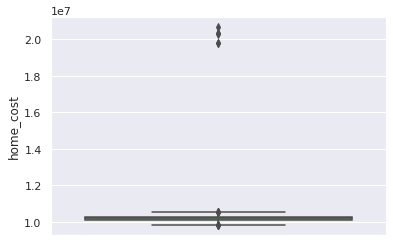

In [7]:
sns.boxplot(data = df, y = 'home_cost', color='g');

Видим выбросы в районе значения 2*10^7. Вот они:

In [13]:
df[df["home_cost"] > 1.6e7]

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
1140,1,4.0,2.979682e+07,1,82.0,Engineer,2.032128e+07,1.0,0.442221
1779,1,3.0,2.101892e+06,0,20.0,Homemaker,2.031197e+07,1.0,0.276563
3307,1,0.0,2.482825e+07,1,3.0,Executive,1.979488e+07,1.0,0.476812
3380,1,0.0,3.289744e+07,1,3.0,Executive,1.979532e+07,0.0,0.322794
4727,1,1.0,1.368018e+07,1,9.0,Marketing,2.065792e+07,1.0,0.417330


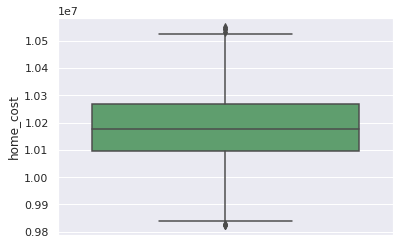

In [14]:
df.drop(df[df["home_cost"] > 1.6e7].index, inplace=True)
sns.boxplot(data = df, y = 'home_cost', color='g');

# Проверка гипотез (15 баллов)

<div class="alert alert-info">

<b>Описание заданий раздела:</b>    
    
В этом разделел вам предстоит:
* Проверить предложенные утверждения визуально.
* Применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных.

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

<AxesSubplot:xlabel='sex', ylabel='salary'>

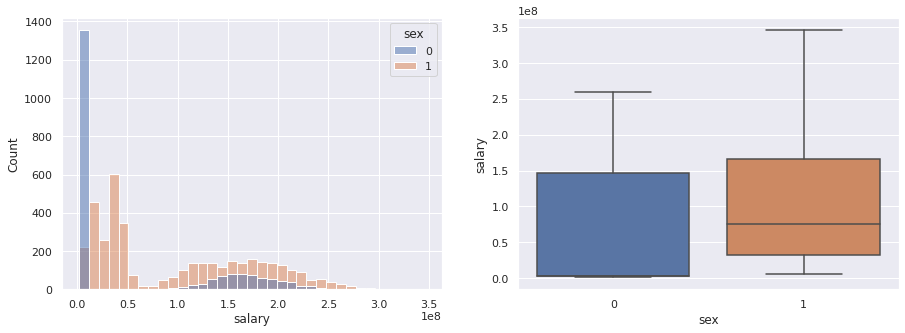

<Figure size 360x576 with 0 Axes>

In [116]:
 # YOUR CODE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.figure(figsize=(5,8))
sns.histplot(ax=axes[0], data=df, x="salary", hue="sex", bins=35)
sns.boxplot(ax=axes[1], data=df, x="sex", y='salary')

In [122]:
#зафиксируем уровень статистической значимости

alpha = 0.05

# распределения не похожи на нормальные, используем критерий Манна-Уитни(выборки несвязные)

Salary_m = df[df["sex"] == 1]['salary']
Salary_w = df[df["sex"] == 0]['salary']

_, p = scipy.stats.mannwhitneyu(Salary_m, Salary_w)
print(f"p-value: {p}")

if p > alpha:
    print("Медианы одинаковые")
else:
    print("Медианы отличаются")

p-value: 1.0692585340727922e-216
Медианы отличаются


Медианы отличаются и по гистограмме видим, что мужчины зарабатывают больше

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

<AxesSubplot:xlabel='profession', ylabel='salary'>

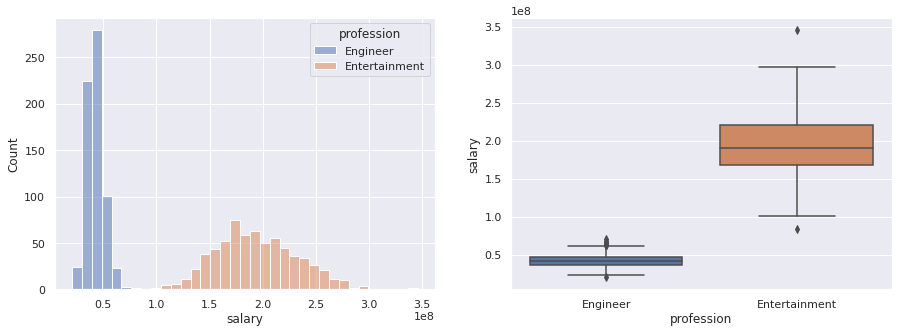

In [115]:
 # YOUR CODE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_batch = df[(df['profession'] == 'Engineer') | (df['profession'] == 'Entertainment')]
sns.histplot(ax=axes[0], data=df_batch, x="salary", hue="profession", bins=35)
sns.boxplot(ax=axes[1], data=df_batch, x="profession", y='salary')

In [92]:
# Распределения похожи на нормальные, берем т-тест

Salary_eng = df[df['profession'] == 'Engineer']["salary"]
Salary_ent = df[df['profession'] == 'Entertainment']["salary"]
                
_, p = scipy.stats.ttest_ind(Salary_eng, Salary_ent)
print(f"p-value: {p}")

if p > alpha:
    print("Средние одинаковые")
else:
    print("Средние отличаются")

p-value: 0.0
Средние отличаются


Средние отличаются, и по гистограмме мы видим, что инженеры зарабатывают в среднем меньше

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

<AxesSubplot:xlabel='more_than_3_ch', ylabel='salary'>

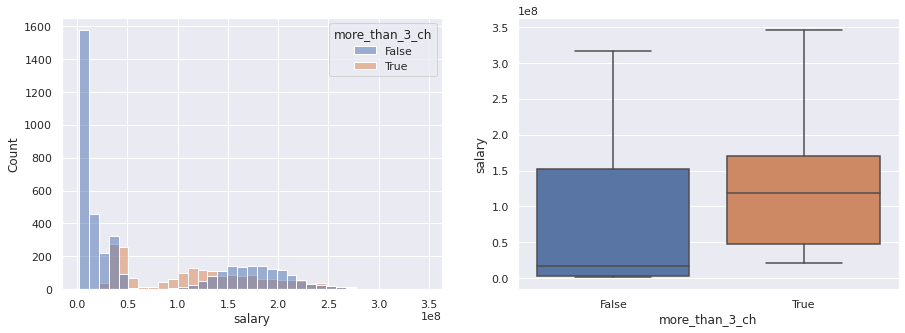

In [113]:
 # YOUR CODE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df["more_than_3_ch"] = df["children"] > 3
sns.histplot(ax=axes[0], data=df, x="salary", hue="more_than_3_ch", bins=35)
sns.boxplot(ax=axes[1], data=df, x="more_than_3_ch", y="salary")

In [123]:
Salary_m3 = df[df["more_than_3_ch"] == True]["salary"]
Salary_l3 = df[df["more_than_3_ch"] == False]["salary"]

# распределение не нормальное, используем Манна-Уитни

_, p = scipy.stats.mannwhitneyu(Salary_m3, Salary_l3)
print(f"p-value: {p}")

if p > alpha:
    print("Медианы одинаковые")
else:
    print("Медианы отличаются")

p-value: 8.453125961156669e-194
Медианы отличаются


Медианы отличаются, и по боксплоту видем, что это правда

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

<AxesSubplot:xlabel='profession', ylabel='home_cost'>

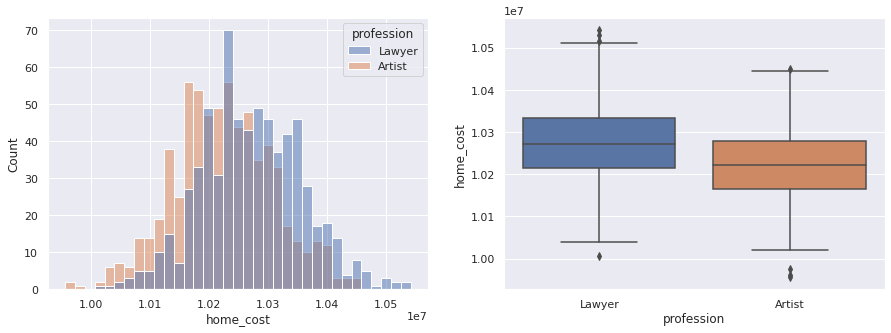

In [117]:
# YOUR CODE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_batch = df[(df['profession'] == 'Artist') | (df['profession'] == 'Lawyer')]
sns.histplot(ax=axes[0], data=df_batch, x="home_cost", hue="profession", bins=35)
sns.boxplot(ax=axes[1], data=df_batch, x="profession", y='home_cost')

In [118]:
# Распределения похожи на нормальные, берем т-тест

home_art = df[df['profession'] == 'Artist']["home_cost"]
home_law = df[df['profession'] == 'Lawyer']["home_cost"]
                
_, p = scipy.stats.ttest_ind(Salary_eng, Salary_ent)
print(f"p-value: {p}")

if p > alpha:
    print("Средние одинаковые")
else:
    print("Средние отличаются")

p-value: 0.0
Средние отличаются


Средние в распределениях отличаются, и по графикам видим, что правда, художники живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов

<div class="alert alert-warning">
    
* Прада ли, что недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке?

<AxesSubplot:xlabel='was_married', ylabel='home_cost'>

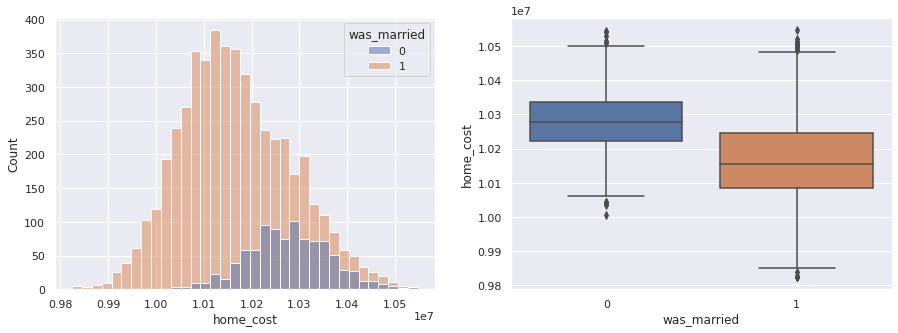

In [119]:
# YOUR CODE
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(ax=axes[0], data=df, x="home_cost", hue="was_married", bins=35)
sns.boxplot(ax=axes[1], data=df, x="was_married", y='home_cost')

In [121]:
# Распределения похожи на нормальные, берем т-тест

home_m = df[df['was_married'] == True]["home_cost"]
home_nm = df[df['was_married'] == False]["home_cost"]
                
_, p = scipy.stats.ttest_ind(home_m, home_nm)
print(f"p-value: {p}")

if p > alpha:
    print("Средние одинаковые")
else:
    print("Средние отличаются")

p-value: 2.2517376196728854e-163
Средние отличаются


Средние отличаются, видим что у не бывавших в браке недвижимость дороже, так что непрада

<div class="alert alert-warning">
    
* Прада ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - воспользуйтесь критерием хи-квадрат из библиотеки scipy

In [132]:
# YOUR CODE
table = pd.crosstab(df["was_married"], df["sex"])
p = scipy.stats.chi2_contingency(table)
print(f'p-value: {p[1]}')
if p[1] > alpha:
    print("Доли одинаковые")
else:
    print("Доли отличаются")

p-value: 3.9762585992254126e-150
Доли отличаются


In [133]:
table

sex,0,1
was_married,,
0,670,278
1,1358,3689


Утверждение не прада, мужчины бывают в браке чаще

# Гипотезы при множественном тестировании (10 баллов)

In [ ]:
# Подсказка: 
# - дисперсионнай анализ  f_oneway()
# - Крускал Уоллиса

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

<AxesSubplot:xlabel='profession', ylabel='salary'>

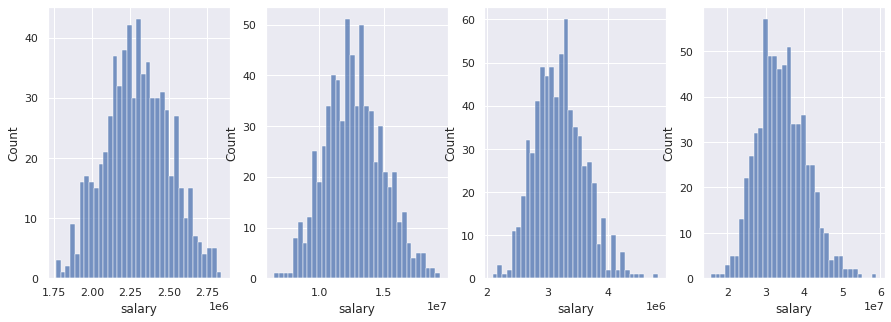

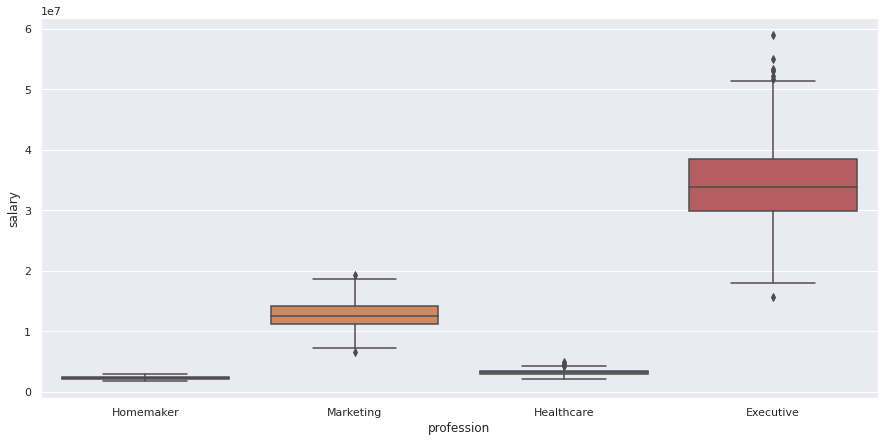

In [158]:
# YOUR CODE
l = ["Homemaker", "Marketing", "Healthcare", "Executive"]
df_batch = df[df['profession'].isin(l)]
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    sns.histplot(ax=axes[i], data=df[df.profession == l[i]], x="salary", bins=35)
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_batch, y="salary", x='profession')

In [167]:
#применим тест Краскала-Уоллиса

Col_1 = df[df["profession"]=='Homemaker']["salary"].values
Col_2 = df[df["profession"]=='Marketing']["salary"].values
Col_3 = df[df["profession"]=='Healthcare']["salary"].values
Col_4 = df[df["profession"]=='Executive']["salary"].values
_, p = scipy.stats.mstats.kruskalwallis(Col_1, Col_2, Col_3, Col_4)
print(f"p-value: {p}")

if p > alpha:
    print("Распределения одинаковые")
else:
    print("Распределения отличаются")

p-value: 0.0
Распределения отличаются


Распределения отличаются, следовательно гипотеза неправдива

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

<AxesSubplot:xlabel='profession', ylabel='salary'>

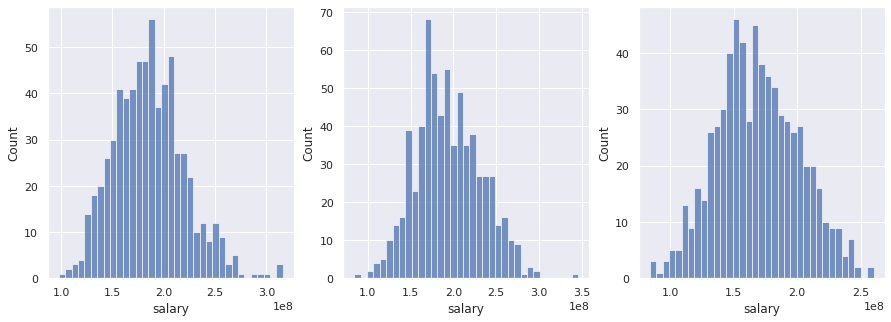

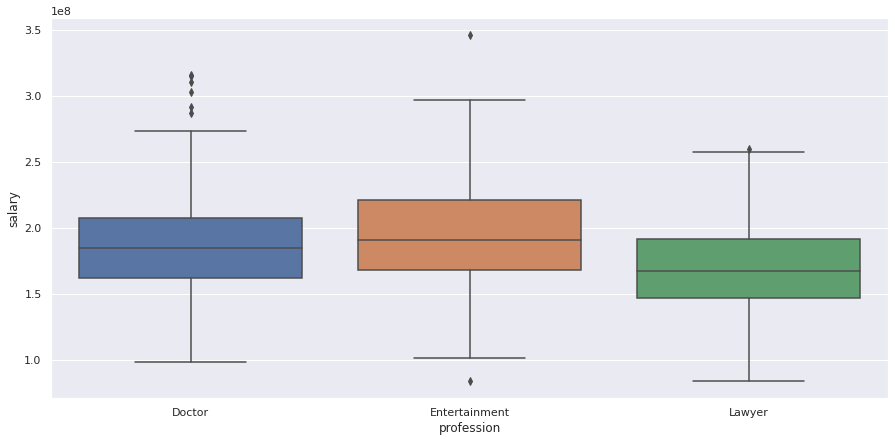

In [169]:
# YOUR CODE
l = ["Doctor", "Entertainment", "Lawyer"]
df_batch = df[df['profession'].isin(l)]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    sns.histplot(ax=axes[i], data=df[df.profession == l[i]], x="salary", bins=35)
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_batch, y="salary", x='profession')

In [172]:
#применим тест Краскала-Уоллиса

args = [df[df.profession==prof].salary.values for prof in l]
_, p = scipy.stats.mstats.kruskalwallis(*args)
print(f"p-value: {p}")

if p > alpha:
    print("Распределения одинаковые")
else:
    print("Распределения отличаются")

p-value: 1.0646324464025486e-33
Распределения отличаются


Наша гипотеза неправильна и у **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты отличаются между собой

# Регрессионный Анализ (20 баллов)

Взглянем от чего зависит уровень счастья

In [178]:
import statsmodels.api as smf

# Рекомендации: 
# Используйте библиотку statsmodels для оценки вклада каждого фактора
# Выведения отчета о модели - model.summary()

<div class="alert alert-warning">
    
Выполните следующие задания и на основе результатов ответьте на вопросы:

* Постройте регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)
* Существует ли связь между уровнем счастья и зарплатой?

* Насколько сильны эти отношения?

* Как факт брака способствуют стоимости недвижимости?

* Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?

* Постройте график зависимостей целевой переменной от приведенных числовых факторов. 
    
* Какие признаки не влияют на уровень счастья? (стат. значимость)
    
* Какой признак самый сильный?
    
* Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?

* Наблюдается ли гетероскедастичность в остатках?
    
* Есть ли в данных автокоррелированность?  

In [181]:
Y = df['happyness']
feats = ['was_married', 'children', 'salary', 'sex', 'age', 'home_cost']
X = df[feats]
model = smf.OLS(Y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              happyness   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                          1.832e+04
Date:                Sat, 18 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:47:11   Log-Likelihood:                          4710.3
No. Observations:                5995   AIC:                                     -9409.
Df Residuals:                    5989   BIC:                                     -9369.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Видим, что в нашей модели sex больше всего влияет на уровень счастья, salary и home_cost меньше всего(какой-то странный городок). Недвижимость у состоявших/состоящих в браке людей стоит дешевле

Text(0.5, 1.08, 'Графики остатков')

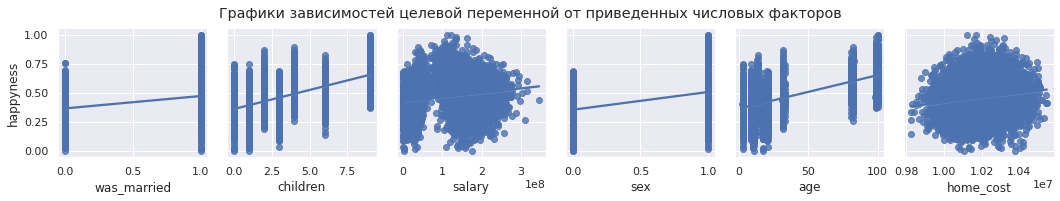

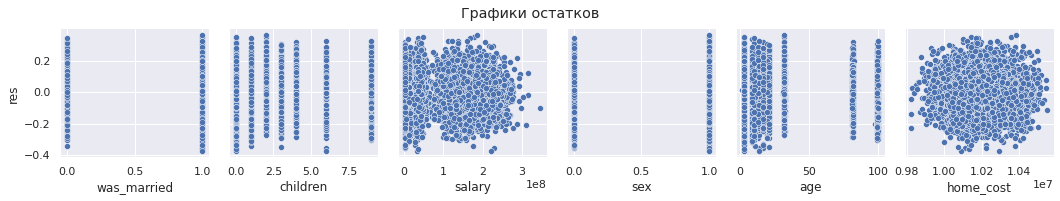

In [191]:
g1 = sns.pairplot(
    df, 
    y_vars='happyness', 
    x_vars=feats, 
    kind='reg',
    diag_kind=None
);
g1.fig.suptitle("Графики зависимостей целевой переменной от приведенных числовых факторов", y=1.08)
df['res'] = model.resid
g2 = sns.pairplot(
    df, 
    y_vars='res', 
    x_vars=feats, 
    diag_kind=None
);
g2.fig.suptitle("Графики остатков", y=1.08)

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**